In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
data_training_complete = pd.read_csv('walk_training.csv')  
data_training_processed = data_training_complete.iloc[:, 0:1].values  
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0, 1))

In [2]:
data_training_scaled = scaler.fit_transform(data_training_processed) 
features_set = []  
labels = []  
for i in range(60, 5000):  
    features_set.append(data_training_scaled[i-60:i, 0])
    labels.append(data_training_scaled[i, 0])
#features_set, labels = np.array(features_set), np.array(labels)  
#features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [3]:
data_training_complete = pd.read_csv('walk2_training.csv')  
data_training_processed = data_training_complete.iloc[:, 0:1].values 
data_training_scaled = scaler.fit_transform(data_training_processed) 
for i in range(60, 5000):  
    features_set.append(data_training_scaled[i-60:i, 0])
    labels.append(data_training_scaled[i, 0])
features_set, labels = np.array(features_set), np.array(labels)  
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [4]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout 

Using TensorFlow backend.


In [5]:
model = Sequential()  
model.add(LSTM(units=30, return_sequences=True, input_shape=(features_set.shape[1], 1)))  
model.add(Dropout(0.2))
model.add(LSTM(units=30))  
model.add(Dropout(0.2))
"""
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))
model.add(LSTM(units=50))  
model.add(Dropout(0.2))  
"""
model.add(Dense(units = 1))  
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  
model.fit(features_set, labels, epochs = 30, batch_size = 32)  

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
9880/9880 [==============================] - 16s - loss: 0.0275    
Epoch 2/30
9880/9880 [==============================] - 15s - loss: 0.0136    
Epoch 3/30
9880/9880 [==============================] - 16s - loss: 0.0109    
Epoch 4/30
9880/9880 [==============================] - 17s - loss: 0.0091    
Epoch 5/30
9880/9880 [==============================] - 16s - loss: 0.0070    
Epoch 6/30
9880/9880 [==============================] - 16s - loss: 0.0059    
Epoch 7/30
9880/9880 [==============================] - 17s - loss: 0.0051    
Epoch 8/30
9880/9880 [==============================] - 17s - loss: 0.0047    
Epoch 9/30
9880/9880 [==============================] - 17s 

In [22]:
data_testing_complete = pd.read_csv('walk_test.csv')  
data_testing_processed = data_testing_complete.iloc[:, 0:1].values 
data_testing_scaled = scaler.fit_transform(data_testing_processed) 

In [23]:
features_set = []  
labels = []  
for i in range(1060, 3300):  
    features_set.append(data_testing_scaled[i-60:i, 0])
    labels.append(data_testing_scaled[i, 0])
features_set, labels = np.array(features_set), np.array(labels)  
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  

predictions = model.predict(features_set)  
# predictions = scaler.inverse_transform(predictions) 

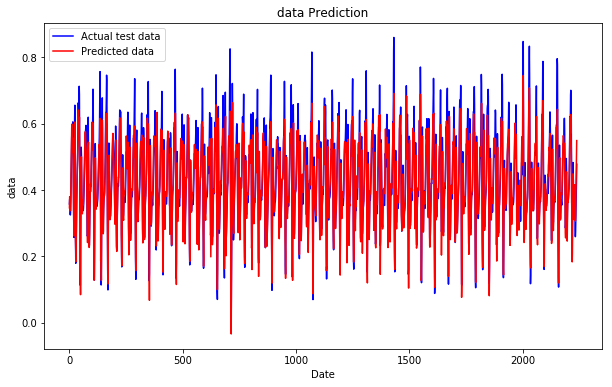

In [24]:
plt.figure(figsize=(10,6))  
plt.plot(labels, color='blue', label='Actual test data')  
plt.plot(predictions , color='red', label='Predicted data')  
plt.title('data Prediction')  
plt.xlabel('Date')  
plt.ylabel('data')  
plt.legend()  
plt.show() 

In [18]:
data_testing_complete = pd.read_csv('down_test.csv')  
data_testing_processed = data_testing_complete.iloc[:, 0:1].values 
data_testing_scaled = scaler.fit_transform(data_testing_processed) 

In [19]:
features_set = []  
labels = []  
for i in range(1060, 3300):  
    features_set.append(data_testing_scaled[i-60:i, 0])
    labels.append(data_testing_scaled[i, 0])
features_set, labels = np.array(features_set), np.array(labels)  
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  

predictions = model.predict(features_set)  
# predictions = scaler.inverse_transform(predictions)

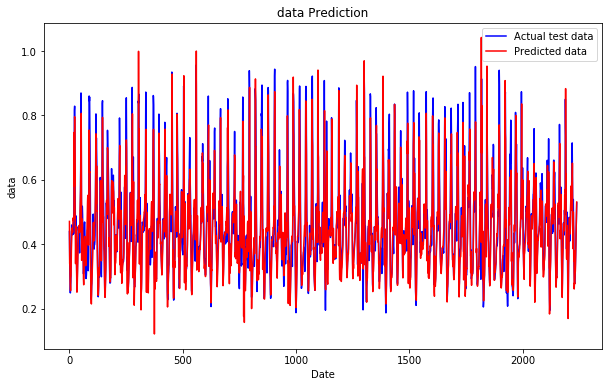

In [20]:
plt.figure(figsize=(10,6))  
plt.plot(labels, color='blue', label='Actual test data')  
plt.plot(predictions , color='red', label='Predicted data')  
plt.title('data Prediction')  
plt.xlabel('Date')  
plt.ylabel('data')  
plt.legend()  
plt.show() 

In [10]:
data_testing_complete = pd.read_csv('up_test.csv')  
data_testing_processed = data_testing_complete.iloc[:, 0:1].values 
data_testing_scaled = scaler.fit_transform(data_testing_processed) 

In [11]:
features_set = []  
labels = []  
for i in range(1060, 1300):  
    features_set.append(data_testing_scaled[i-60:i, 0])
    labels.append(data_testing_scaled[i, 0])
features_set, labels = np.array(features_set), np.array(labels)  
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  

predictions = model.predict(features_set)  
# predictions = scaler.inverse_transform(predictions)

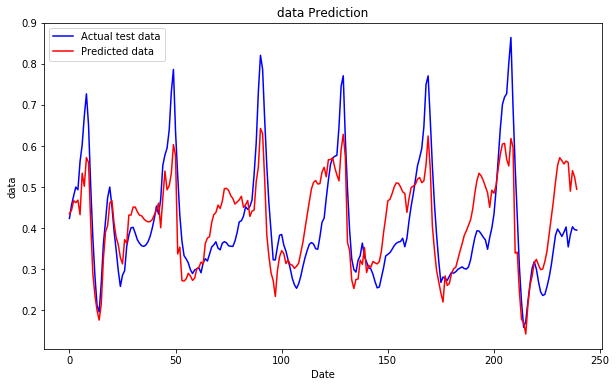

In [12]:
plt.figure(figsize=(10,6))  
plt.plot(labels, color='blue', label='Actual test data')  
plt.plot(predictions , color='red', label='Predicted data')  
plt.title('data Prediction')  
plt.xlabel('Date')  
plt.ylabel('data')  
plt.legend()  
plt.show() 

In [33]:
data_testing_complete = pd.read_csv('walk2_test.csv')  
data_testing_processed = data_testing_complete.iloc[:, 0:1].values 
data_testing_scaled = scaler.fit_transform(data_testing_processed) 

In [34]:
features_set = []  
labels = []  
for i in range(1060, 1300):  
    features_set.append(data_testing_scaled[i-60:i, 0])
    labels.append(data_testing_scaled[i, 0])
features_set, labels = np.array(features_set), np.array(labels)  
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  

predictions = model.predict(features_set)  
# predictions = scaler.inverse_transform(predictions)

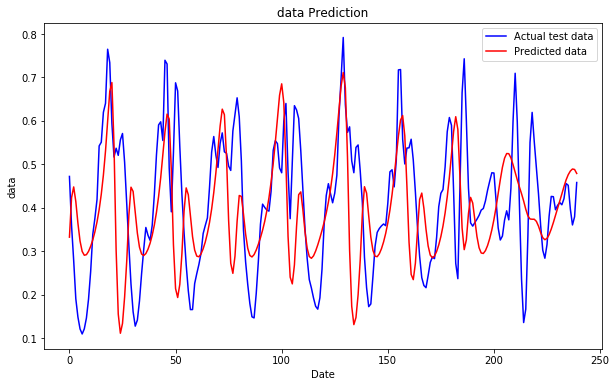

In [35]:
plt.figure(figsize=(10,6))  
plt.plot(labels, color='blue', label='Actual test data')  
plt.plot(predictions , color='red', label='Predicted data')  
plt.title('data Prediction')  
plt.xlabel('Date')  
plt.ylabel('data')  
plt.legend()  
plt.show() 

In [25]:
from scipy.stats import pearsonr
pearsonr(labels, predictions[:,0])

(0.9486202241485647, 0.0)